In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=96980d827b9db2e233cb0e2bb9c7f1535f5091efc66f37d688b5f7c7de075535
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-3-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
df = pd.read_csv('combined_final_removed.csv', encoding='latin1')


In [ ]:
model_performance = pd.DataFrame(columns = ['R2 Value','RMSE', 'Accuracy (Threshold = 0.5)', 'Prediction expected(65%)', 'time to train(seconds)', 'time to predict(seconds)', 'total time(seconds)'])

In [ ]:
df.head(10)

,Test_Cell_Temp[C],Test_Cell_RH[%],Dyno_Tractive_Effort[N],Accelerator_Pedal_Position[%],HV_Battery_Current[A],HV_Battery_Voltage[V],Motor_Speed[rpm],HV_Battery_SOC[%]
0,20.163,75.938,-11.561,0.0,2.154,335.668,0.0,100.0
1,20.162,75.934,-11.639,0.0,2.159,335.654,0.0,100.0
2,20.160,75.927,-11.475,0.0,2.131,335.656,0.0,100.0
3,20.159,75.925,-11.435,0.0,2.131,335.660,0.0,100.0
4,20.161,75.925,-11.372,0.0,2.128,335.663,0.0,100.0
5,20.161,75.925,-11.554,0.0,2.145,335.660,0.0,100.0
6,20.160,75.925,-11.708,0.0,2.144,335.660,0.0,100.0
7,20.160,75.924,-11.468,0.0,2.137,335.653,0.0,100.0
8,20.161,75.921,-11.624,0.0,2.130,335.656,0.0,100.0
9,20.159,75.915,-11.587,0.0,2.122,335.660,0.0,100.0


In [ ]:
sensor_list = df.columns[0:-1]

In [ ]:
sensor_list

Index(['Test_Cell_Temp[C]', 'Test_Cell_RH[%]', 'Dyno_Tractive_Effort[N]',
       'Accelerator_Pedal_Position[%]', 'HV_Battery_Current[A]',
       'HV_Battery_Voltage[V]', 'Motor_Speed[rpm]'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570809 entries, 0 to 570808
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Test_Cell_Temp[C]              570809 non-null  float64
 1   Test_Cell_RH[%]                570809 non-null  float64
 2   Dyno_Tractive_Effort[N]        570809 non-null  float64
 3   Accelerator_Pedal_Position[%]  570809 non-null  float64
 4   HV_Battery_Current[A]          570809 non-null  float64
 5   HV_Battery_Voltage[V]          570809 non-null  float64
 6   Motor_Speed[rpm]               570809 non-null  float64
 7   HV_Battery_SOC[%]              570809 non-null  float64
dtypes: float64(8)
memory usage: 34.8 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_Cell_Temp[C],570809.0,16.549710,17.945539,-18.424,-4.151,21.880,27.071,40.970
Test_Cell_RH[%],570809.0,34.439830,20.345511,1.783,18.572,34.828,48.907,85.644
Dyno_Tractive_Effort[N],570809.0,126.971012,1122.583298,-9629.539,-11.784,84.495,317.886,10426.434
Accelerator_Pedal_Position[%],570809.0,16.777127,16.650367,0.000,0.000,16.809,26.400,100.000
HV_Battery_Current[A],570809.0,35.010340,58.009374,-119.551,0.639,28.042,57.726,532.638
HV_Battery_Voltage[V],570809.0,264.075165,101.775405,-0.195,281.817,297.113,314.478,350.882
Motor_Speed[rpm],570809.0,3974.241622,3244.726501,-89.165,217.630,3475.084,7215.133,11004.271
HV_Battery_SOC[%],570809.0,52.437324,32.610702,0.000,22.100,52.900,84.600,100.000


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list = [], threshold_out = 0.05, verbose = True):
  included = list(X.columns)
  while True:
    changed = False
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()

    pvalues = model.pvalues.iloc[1:]
    worst_pval = pvalues.max()
    if worst_pval > threshold_out:
      changed = True
      worst_feature = pvalues.idxmax()
      included.remove(worst_feature)

      if verbose:
        print(f"worst_feature : {worst_feature}, {worst_pval}")

    if not changed:
      break

  Selected_Features.append(included)
  print(f"\nSelected Features : \n {Selected_Features[0]}")

XX = df.iloc[: , :-1]
yy = df.iloc[:, -1]
backward_regression(XX, yy)


Selected Features : 
 ['Test_Cell_Temp[C]', 'Test_Cell_RH[%]', 'Dyno_Tractive_Effort[N]', 'Accelerator_Pedal_Position[%]', 'HV_Battery_Current[A]', 'HV_Battery_Voltage[V]', 'Motor_Speed[rpm]']


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs= -1,
                              n_estimators= 100,
                              min_samples_leaf= 1,
                              max_features= 'sqrt',
                              bootstrap= True,
                              criterion= 'friedman_mse',
                              ).fit(X_train, y_train)
end_train = time.time()

In [ ]:
y_predictions = model.predict(X_test)
end_predict = time.time()

In [ ]:
print(end_train - start)
print(end_predict - end_train)

129.93624925613403
22.222153663635254


In [ ]:
print('R- squared value: '+ "{:.2%}".format(model.score(X_test, y_test)))

R- squared value: 99.98%


In [ ]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test, y_predictions, squared = False)))

Root Mean Squared Error: 0.48


In [ ]:
m1 = model.predict([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]])

In [ ]:
m1[0]

66.05097000000006

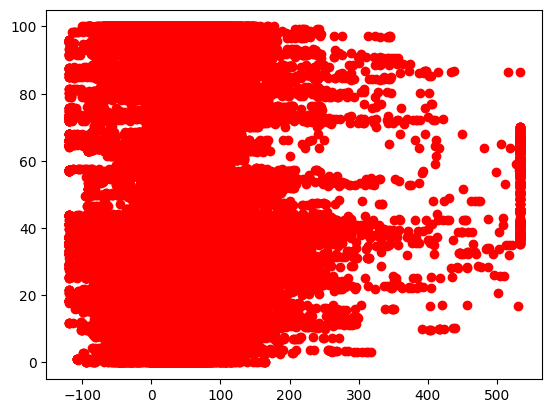

In [ ]:
plt.scatter(X_test[:, -3], y_test, color ='red')

In [ ]:
threshold = 0.5
correct_predictions = np.abs(np.array(y_test)- np.array(y_predictions)) <= threshold
accuracy1 = (np.sum(correct_predictions) / len(y_test))*100
print(accuracy1)

95.35922636253744


In [ ]:
model_performance.loc['Random Forest'] = [model.score(X_test, y_test),
                                          (mean_squared_error(y_test, y_predictions, squared = False)),
                                          accuracy1,
                                          m1[0],
                                          end_train - start,
                                          end_predict - end_train,
                                          end_predict - start]

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
start1 = time.time()
model1 = KNeighborsRegressor(n_neighbors= 3).fit(X_train, y_train)
end_train1 = time.time()

In [ ]:
y_predictions1 = model1.predict(X_test)
end_predict1 = time.time()

In [ ]:
print('R-squared value: ' + "{:.2%}".format(model1.score(X_test, y_test)))

R-squared value: 92.09%


In [ ]:
print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test, y_predictions1, squared = False)))

Root Mean Squared Error: 9.17


In [ ]:
m2 = model1.predict([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]])
m2[0]

57.79999999999999

In [ ]:
threshold = 0.5
correct_predictions = np.abs(np.array(y_test)- np.array(y_predictions1)) <= threshold
accuracy2 = (np.sum(correct_predictions) / len(y_test))*100
print(accuracy2)

57.66367092377499


In [ ]:
model_performance.loc['KNN'] = [model1.score(X_test, y_test),
                                (mean_squared_error(y_test, y_predictions1, squared = False)),
                                          accuracy2,
                                          m2[0],
                                          end_train1 - start1,
                                          end_predict1 - end_train1,
                                          end_predict1 - start1]

Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
start2 = time.time()
model2 = ExtraTreesRegressor()
model2.fit(X_train, y_train)
end_train2 = time.time()

In [ ]:
y_predictions2 = model2.predict(X_test)
end_predict2 = time.time()

In [ ]:
threshold = 0.5
correct_predictions = np.abs(np.array(y_test)- np.array(y_predictions2)) <= threshold
accuracy3 = (np.sum(correct_predictions) / len(y_test))*100
print(accuracy3)

98.53541458628966


In [ ]:
m3 = model2.predict([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]])
m3[0]

63.592020000000026

In [ ]:
print('R-squared value: ' + "{:.2%}".format(model2.score(X_test, y_test)))

R-squared value: 99.98%


In [ ]:
print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test, y_predictions2, squared = False)))

Root Mean Squared Error: 0.49


In [ ]:
model_performance.loc['Extra Trees Regressor'] = [model2.score(X_test, y_test),
                                                  (mean_squared_error(y_test, y_predictions2, squared = False)),
                                          accuracy3,
                                          m3[0],
                                          end_train2 - start2,
                                          end_predict2 - end_train2,
                                          end_predict2 - start2]

#Extreme Gradient Boosting

In [ ]:

import xgboost as xgb
from sklearn.metrics import r2_score
start3 = time.time()
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)
params = {
    'objective' : 'reg:squarederror',
    'max_depth' : 3,
    'learning_rate' : 0.1,
    'n_estimators' : 100,
}

model3 = xgb.train(params, dtrain)
end_train3 = time.time()

[17:35:21] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



In [ ]:
y_predictions3 = model3.predict(dtest)
end_predict3 = time.time()

In [ ]:


# Assuming you have already trained an XGBoost model and made predictions

# Calculate R-squared value
r22 = r2_score(y_test, y_predictions3)
print("R-squared value: ", r22)


R-squared value:  0.4232494454659159


In [ ]:
print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test, y_predictions3, squared = False)))

Root Mean Squared Error: 24.77


In [ ]:
threshold = 0.5
correct_predictions = np.abs(np.array(y_test)- np.array(y_predictions3)) <= threshold
accuracy4 = (np.sum(correct_predictions) / len(y_test))*100
print(accuracy4)

0.9556595014102767


In [ ]:
new_data_point = [34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]
dnew = xgb.DMatrix([new_data_point])
m4 = model3.predict(dnew)

In [ ]:
r2 = model3.eval(dtest)
r2 = model3.eval(dtest)
eval_rmse = float(r2.split(':')[1].strip().split()[0])
rounded_eval_rmse = round(eval_rmse, 2)
print(rounded_eval_rmse)



24.77


In [ ]:
r21 = rounded_eval_rmse /100

In [ ]:
model_performance.loc['Extreme Gradient Boosting'] = [r22,
                                               (mean_squared_error(y_test, y_predictions3, squared = False)),
                                          accuracy4,
                                         m4[0],
                                          end_train3 - start3,
                                         end_predict3 - end_train3,
                                         end_predict3 - start3]

#Gradient Boosting

In [ ]:
X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize individual models
gradient_boosting = GradientBoostingRegressor()

# Train individual models
start4 = time.time()
gradient_boosting.fit(X_train1, y_train1)
end_train4 = time.time()

# Make predictions on the testing set
gb_predictions = gradient_boosting.predict(X_test1)
end_predict4 = time.time()



# Calculate the performance of the ensemble model
gb_mse = (mean_squared_error(y_test1, gb_predictions))
gb_rmse = np.sqrt(gb_mse)

# Print the performance metrics
print("gb RMSE:", gb_rmse)


gb RMSE: 4.397135174577251


In [ ]:
 [(gradient_boosting.score(X_test1, y_test1))]

[0.98182653660584]

In [ ]:
print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test1, gb_predictions, squared = False)))

Root Mean Squared Error: 4.40


In [ ]:
threshold = 0.5
correct_predictions = np.abs(np.array(y_test1)- np.array(gb_predictions)) <= threshold
accuracy4 = (np.sum(correct_predictions) / len(y_test1))*100
print(accuracy4)

14.520593542509767


In [ ]:
m4 = gradient_boosting.predict(sc.transform([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]]))
m4

array([59.85528106])

In [ ]:
model_performance.loc['Gradient Boosting'] = [[(gradient_boosting.score(X_test, y_test))],
                               gb_rmse,
                                          accuracy4,
                                          m4[0],
                                          end_train4 - start4,
                                          end_predict4 - end_train4,
                                          end_predict4 - start4]

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


#Ensemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize individual models
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()

# Train individual models
start5 = time.time()
random_forest.fit(X_train2, y_train2)
gradient_boosting.fit(X_train2, y_train2)
end_train5 = time.time()

# Make predictions on the testing set
rf_predictions = random_forest.predict(X_test2)
gb_predictions = gradient_boosting.predict(X_test2)
end_predict5 = time.time()

# Create an ensemble prediction by averaging the individual model predictions
ensemble_predictions = (rf_predictions + gb_predictions) / 2

# Calculate the performance of the ensemble model
ensemble_mse = (mean_squared_error(y_test, ensemble_predictions))
ensemble_rmse = np.sqrt(ensemble_mse)

# Print the performance metrics
print("Ensemble RMSE:", ensemble_rmse)


Ensemble RMSE: 2.3192324944369416


In [ ]:
RMSE_ensemble = [(mean_squared_error(y_test, rf_predictions, squared = False)) + (mean_squared_error(y_test, gb_predictions, squared = False))]
RMSE_ensemble = RMSE_ensemble[0] / 2
RMSE_ensemble

2.6114924298044317

In [ ]:
r2_ensemble = [(random_forest.score(X_test, y_test)) + (gradient_boosting.score(X_test, y_test))]
r2_ensemble = r2_ensemble[0]/2
r2_ensemble

-3.258755063274961

In [ ]:
threshold = 0.5
correct_predictions = np.abs(np.array(y_test)- np.array(ensemble_predictions)) <= threshold
accuracy5 = (np.sum(correct_predictions) / len(y_test))*100
print(accuracy5)

30.233352604194042


In [ ]:
m1 = random_forest.predict(([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]]))
m2 = gradient_boosting.predict(([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]]))

In [ ]:
l = (m1+m2)/2
l

array([59.63814034])

In [ ]:
model_performance.loc['Ensemble'] = [r2_ensemble,
                                    RMSE_ensemble,
                                          accuracy5,
                                          l[0],
                                          end_train5 - start5,
                                          end_predict5- end_train5,
                                          end_predict5 - start5]

In [ ]:
formatted_model_performance = model_performance.style.background_gradient(cmap='RdYlBu_r').format({
    'R2 value': '{:.2%}',
    'RMSE' : '{:.2f}',
    'Accuracy (Threshold = 0.5)': '{:.2f}',
    'Prediction': '{:.2f}',
    'time to train': '{:.3f}',
    'time to predict': '{:.3f}',
    'total time': '{:.3f}'
})

formatted_model_performance


,R2 Value,RMSE,Accuracy (Threshold = 0.5),Prediction expected(65%),time to train(seconds),time to predict(seconds),total time(seconds)
Random Forest,0.999777,0.49,95.53,67.014070,148.313022,2.937698,151.250721
KNN,0.920876,9.17,95.53,57.800000,1.379665,3.003967,4.383631
Extra Trees Regressor,0.999780,0.48,98.60,64.245010,97.924476,5.128413,103.052889
Extreme Gradient Boosting,0.423249,24.77,0.96,39.713783,4.480866,0.043114,4.523981
Gradient Boosting,[-4.672191588852742],4.40,14.52,59.855281,138.478370,0.170155,138.648525
Ensemble,0.990597,2.61,30.24,59.638140,549.973771,4.048824,554.022595


In [ ]:
# X_train3 = X_train
# X_test3 = X_test
# y_train3 = y_train
# y_test3 = y_test

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# sc = MinMaxScaler()
# X_train3 = sc.fit_transform(X_train3)
# X_test3 = sc.transform(X_test3)

In [ ]:
# # Import the necessary libraries
# import xgboost as xgb
# from sklearn.datasets import make_regression
# #from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Generate a synthetic regression dataset
# #X, y = make_regression(n_samples=1000, random_state=42)

# # Split the data into training and testing sets
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Gradient Boosting Regressor
# gb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# # Train the model
# gb_regressor.fit(X_train3, y_train3)

# # Make predictions on the testing set
# y_pred = gb_regressor.predict(X_test3)

# # Evaluate the performance of the model
# mse = mean_squared_error(y_test3, y_pred)
# print("Mean Squared Error:", mse)


Mean Squared Error: 2.95153208863551


In [ ]:
# threshold = 0.5
# correct_predictions = np.abs(np.array(y_test)- np.array(y_pred)) <= threshold
# accuracy6 = (np.sum(correct_predictions) / len(y_test))*100
# print(accuracy6)

49.66889157513008


In [ ]:
# print('R-squared value: ' + "{:.2%}".format(gb_regressor.score(X_test, y_test)))

R-squared value: 99.72%


In [ ]:
# print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error: 1.72


In [ ]:
# m6 = gb_regressor.predict(([[34.609, 71.085, -11.381, 1, 0.508, 310.592, -1]]))
# m6

array([60.09577], dtype=float32)

#KNN

In [ ]:
# X_train2 = X_train
# X_test2 = X_test
# y_train2 = y_train
# y_test2 = y_test

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# sc = MinMaxScaler()
# X_train2 = sc.fit_transform(X_train2)
# X_test2 = sc.transform(X_test2)

In [ ]:
# # Import the necessary libraries
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.datasets import make_regression
# #from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Generate a synthetic regression dataset
# #X, y = make_regression(n_samples=1000, random_state=42)

# # Split the data into training and testing sets
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a KNN Regressor
# knn_regressor = KNeighborsRegressor(n_neighbors=5)

# # Train the model
# knn_regressor.fit(X_train2, y_train2)

# # Make predictions on the testing set
# y_pred1 = knn_regressor.predict(X_test2)

# # Evaluate the performance of the model
# mse = mean_squared_error(y_test, y_pred1)
# print("Mean Squared Error:", mse)


Mean Squared Error: 2.70841424618945


In [ ]:
# threshold = 0.5
# correct_predictions = np.abs(np.array(y_test)- np.array(y_pred1)) <= threshold
# accuracy7 = (np.sum(correct_predictions) / len(y_test))*100
# print(accuracy7)

92.62539198682573


In [ ]:
# print('Root Mean Squared Error: ' + "{:.2f}".format(mean_squared_error(y_test, y_pred1, squared = False)))

Root Mean Squared Error: 1.65
